# Happy Planet Index-Data Analysis Project
### Dor Goldstein

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")

In [26]:
url = 'https://raw.githubusercontent.com/dor34340/DorGold/main/world-happiness-report.csv'
hpp = pd.read_csv(url)
hpp

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


### The file shows the "Happy Planet Index "of the UN.
### The file examines different characteristics in each country in the world according to different characteristics (national product, generosity, social support, perception of corruption, etc.) through which one can compare and test the effect of each characteristic on the level of happiness in the country.

-----
#### We first examined the type of variables in each column to see if it needed to be converted to another type

In [27]:
hpp.dtypes

Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

----
### Next, we will move on to check for missing values and fix them using codes

In [28]:
hpp.isnull().sum().sort_values(ascending=False)

Perceptions of corruption           110
Generosity                           89
Healthy life expectancy at birth     55
Log GDP per capita                   36
Freedom to make life choices         32
Positive affect                      22
Negative affect                      16
Social support                       13
Country name                          0
year                                  0
Life Ladder                           0
dtype: int64

### A preliminary manual inspection was required for all countries with a high amount of missing values. We will remove them from the data according to the criterion: 3 values or more are missing.

### The reason for the criterion is the change in the line data in general and the inability to reflect this as a statistic and thus give the wrong impression of happiness in the country.

In [29]:
hpp_df = hpp.loc[(hpp["Country name"] != 'Cuba') & (hpp["Country name"] != 'Belize') & (hpp["Country name"] != 'Oman')]
hpp_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


## We filled in the "missing values" on average of the same column using a function we wrote, so as not to damage the existing statistics and correlations.

In [30]:
hpp1 = hpp.copy()
hpp2 = hpp1.groupby("Country name")["Life Ladder","Log GDP per capita","Social support","Healthy life expectancy at birth","Freedom to make life choices","Generosity","Perceptions of corruption","Positive affect","Negative affect"].mean()

In [31]:
##---->רק על hhp_df

col = hpp_df.isnull().sum()
def fill_nan(col):
    val = hpp_df[col].mean()
    hpp_df[col] = hpp_df[col].fillna(val)
for i in col.index:
    if col[i] > 0:
        fill_nan(i)
hpp_df.isnull().sum()


##---->רק על hhp2

col = hpp2.isnull().sum()
def fill_nan(col):
   val = hpp2[col].mean()
   hpp2[col] = hpp2[col].fillna(val)
for i in col.index:
   if col[i] > 0:
       fill_nan(i)
hpp2.isnull().sum()

Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

----
### After cleaning and filtering the data, we will start in the simplest way to examine the correlation between different characteristics of happiness

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.036527,0.077408,-0.008466,0.162954,0.218277,-0.041295,-0.079275,-0.003446,0.196214
Life Ladder,0.036527,1.000000,0.784280,0.706126,0.741773,0.527023,0.186028,-0.419725,0.530587,-0.297131
Log GDP per capita,0.077408,0.784280,1.000000,0.683035,0.834617,0.362323,-0.000903,-0.333683,0.297345,-0.204837
Social support,-0.008466,0.706126,0.683035,1.000000,0.613862,0.412940,0.065527,-0.216141,0.431133,-0.395899
Healthy life expectancy at birth,0.162954,0.741773,0.834617,0.613862,1.000000,0.384917,0.020288,-0.311840,0.314399,-0.135717
Freedom to make life choices,0.218277,0.527023,0.362323,0.412940,0.384917,1.000000,0.320741,-0.477972,0.603773,-0.265446
Generosity,-0.041295,0.186028,-0.000903,0.065527,0.020288,0.320741,1.000000,-0.278472,0.349679,-0.088927
Perceptions of corruption,-0.079275,-0.419725,-0.333683,-0.216141,-0.311840,-0.477972,-0.278472,1.000000,-0.290291,0.257608
Positive affect,-0.003446,0.530587,0.297345,0.431133,0.314399,0.603773,0.349679,-0.290291,1.000000,-0.372944
Negative affect,0.196214,-0.297131,-0.204837,-0.395899,-0.135717,-0.265446,-0.088927,0.257608,-0.372944,1.000000


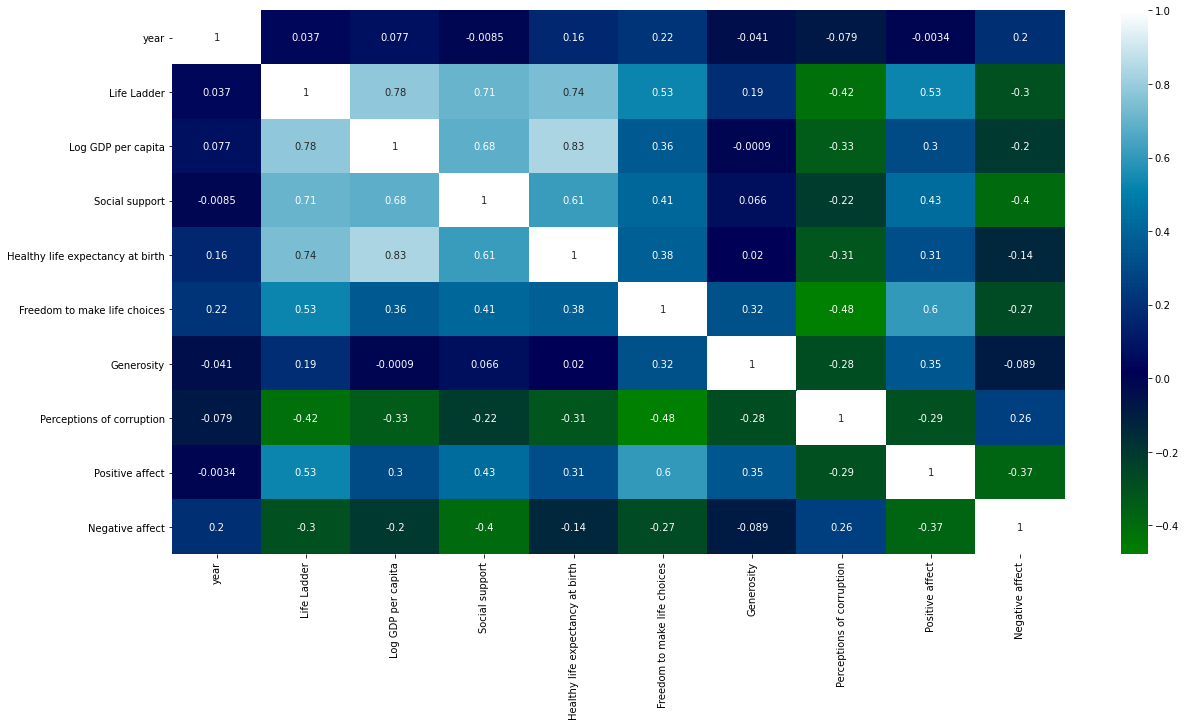

In [32]:
corr = hpp_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(data= corr ,cmap='ocean', annot=True)
corr

---
🦄🦄🦄🦄🦄🦄🦄🦄


### We will examine the relationship between social support and "Life Ladder". We will represent this using: correlations, regression and boxplot

,Social support,Life Ladder
Social support,1.000000,0.706126
Life Ladder,0.706126,1.000000


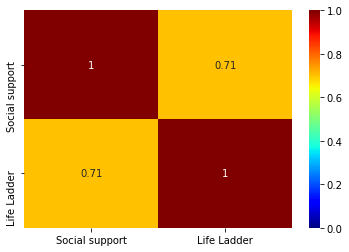

In [33]:
df_life = hpp_df[["Social support" ,'Life Ladder']]
sns.heatmap(df_life.corr(), vmin=0.0 , vmax = 1,cmap='jet' , annot=True)
df_life.corr()

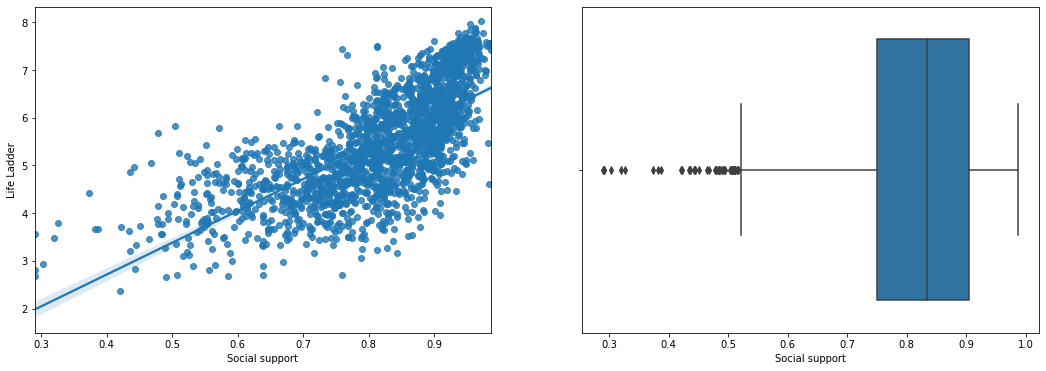

0.834


In [34]:
fig, axes = plt.subplots(figsize=(18, 6), ncols=2)

sns.regplot(ax=axes[0], x="Social support" , y='Life Ladder', data=df_life);
sns.boxplot(ax=axes[1], x='Social support', data=hpp_df)
plt.show()
print(hpp_df["Social support"].median())


### According to the graph, there is a strong correlation between social support in the country and the level of happiness in the country-"Life Ladder".
### In order to check the validity of the claim, we examined the correlation between the countries where the level of social support is high (above the median 0.83) and the correlation between the countries where the level of social support is low (below the median).

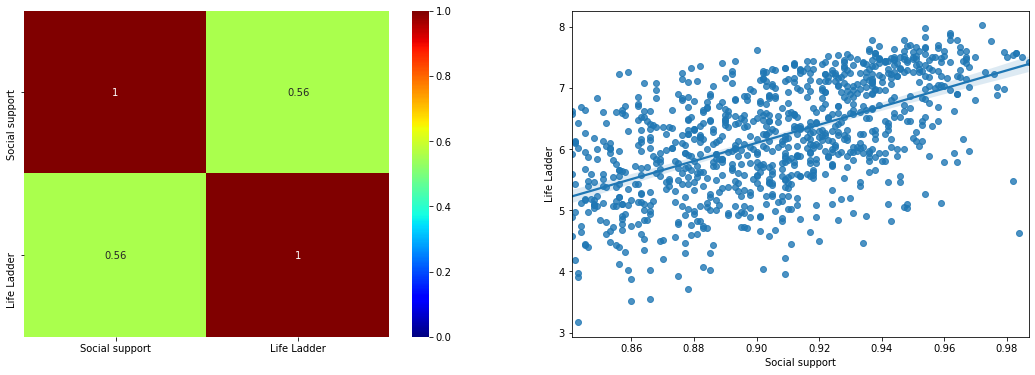

<Figure size 576x432 with 0 Axes>

In [35]:
most_social = df_life[df_life["Social support"] > 0.84]

fig, axes = plt.subplots(figsize=(18, 6), ncols=2)

sns.heatmap(ax = axes[0], data = most_social.corr(), vmin=0.0 , vmax = 1,cmap='jet' , annot=True)
plt.figure(figsize=(8,6))
sns.regplot(ax = axes[1], x="Social support" , y='Life Ladder', data=most_social);

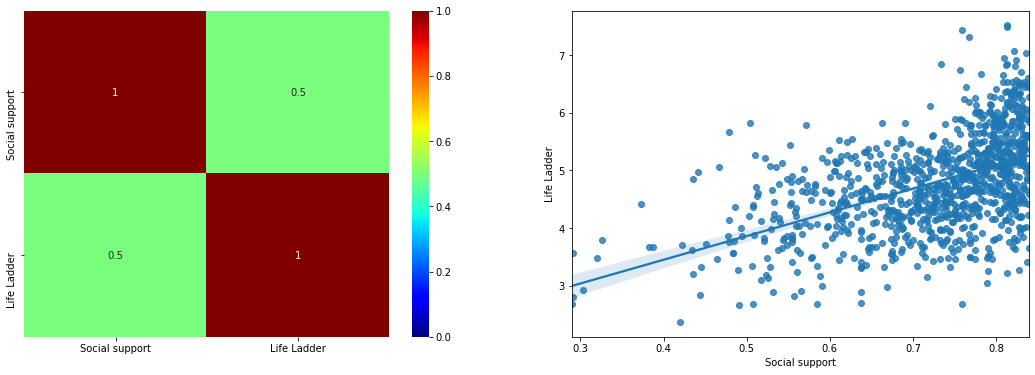

<Figure size 576x432 with 0 Axes>

In [36]:
low_social = df_life[df_life["Social support"] < 0.84]

fig, axes = plt.subplots(figsize=(18, 6), ncols=2)

sns.heatmap(ax = axes[0], data = low_social.corr(), vmin=0.0 , vmax = 1,cmap='jet' , annot=True)
plt.figure(figsize=(8,6))
sns.regplot(ax = axes[1], x="Social support" , y='Life Ladder', data=low_social);

> # Conclusion 1:

> ### We see that social support is a significant component in a happy life in any country - the higher the social support, the higher the "Life Ladder" in the country and vice versa.

-----

### We will now use data grouped by country, and examine the median of the "quality of life" level among all countries in the world. Next, we will define ranges for quality of life and create a "Life Ladder" for all countries in the world.

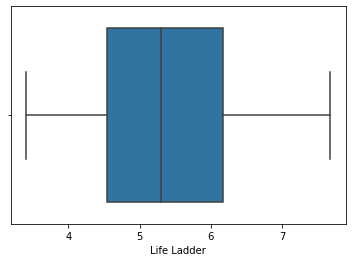

The median Life Ladder 5.306357142857142


In [46]:
sns.boxplot(x="Life Ladder", data=hpp2)
plt.show()
print("The median Life Ladder",hpp2["Life Ladder"].median())

### We will select the boundary edges so that the low (3-4) and high (7-8) ends are equal in the discrete area. That is, maintain a similar proportion between the low range and the high range.

In [38]:
range_ladder = pd.cut(hpp2['Life Ladder'], [3, 4, 7, 8])
ruler_ladder = hpp2.pivot_table('Log GDP per capita', ['Country name', range_ladder])
ruler_ladder

,,Log GDP per capita
Country name,Life Ladder,
Afghanistan,"(3, 4]",7.650833
Albania,"(4, 7]",9.384385
Algeria,"(4, 7]",9.328875
Angola,"(4, 7]",8.990000
Argentina,"(4, 7]",10.033800
...,...,...
Venezuela,"(4, 7]",9.480083
Vietnam,"(4, 7]",8.655286
Yemen,"(3, 4]",8.102700


,Log GDP per capita
Life Ladder,
"(3, 4]",13
"(4, 7]",137
"(7, 8]",16


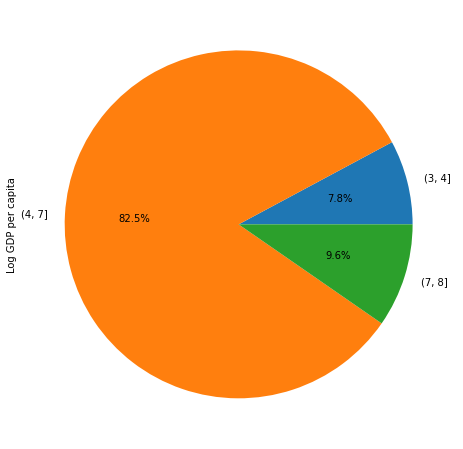

In [39]:
plt.figure(figsize=(8,8))

groupby_ladder = ruler_ladder.groupby("Life Ladder").count()
groupby_ladder["Log GDP per capita"].plot.pie(autopct='%1.1f%%')
groupby_ladder

## We will focus on the countries with the highest percentage of quality of life (the "happy countries"), and we will try to understand what characterizes these countries as the "happiest" countries.
## First, we will examine the relationship between the score on the happiness scale, and the feeling of freedom of choice:

<AxesSubplot:>

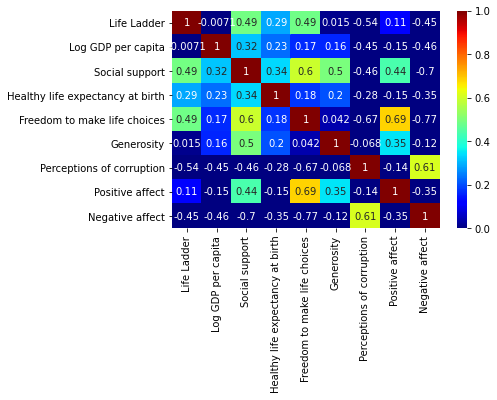

In [40]:
most_happy = hpp2[(hpp2["Life Ladder"] <= 8) & (hpp2["Life Ladder"] > 7)]
sns.heatmap( data = most_happy.corr(), vmin=0.0 , vmax = 1,cmap='jet' , annot=True)

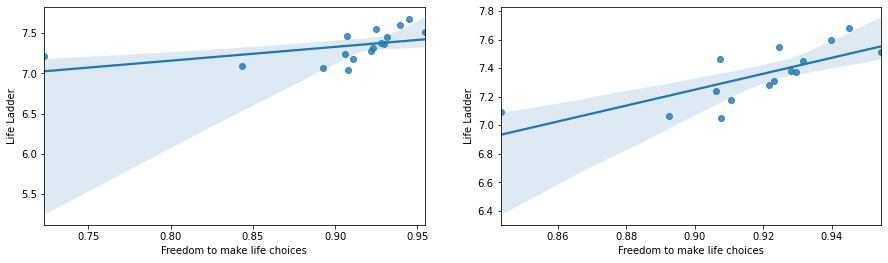

In [41]:

fig, axes = plt.subplots(figsize=(15, 4), ncols=2)

sns.regplot(ax = axes[0], x="Freedom to make life choices" , y='Life Ladder', data=most_happy);
most_happy2 = most_happy.copy()
part1 = most_happy2[0:8]
part2 = most_happy2[9:16]
most_happy3 = pd.concat([part1, part2], axis=0)
sns.regplot(ax = axes[1], x="Freedom to make life choices" , y='Life Ladder', data=most_happy3);

### After filtering a specific country in this characteristic (Israel is problematic) one sees the significance of the connection between freedom of choice and the level of happiness ("Life Ladder") in the country.

🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄

----
#### In order to understand the broader picture, we will focus on another aspect of countries with a high score on the "Life Ladder".
### There seems to be a significant negative relationship between the scale of happiness and the perception of corruption in the country. The higher the scale of happiness and  lower perception of corruption.

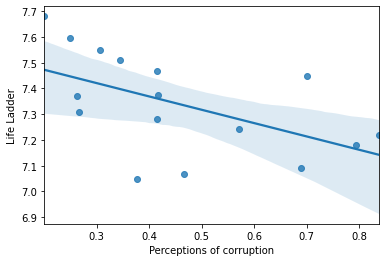

In [42]:
sns.regplot (x="Perceptions of corruption" , y='Life Ladder', data=most_happy);

> ## Conclusion 2:

> ### From the data we have presented, it can be concluded that in happy countries there are common characteristics, such as: the effect of freedom of choice on the happiness scale ("Life Ladder") and the effect of the perception of corruption on the happiness scale.
>### From these conclusions it can be concluded that these are the characteristics of truly happy countries. 

## We will continue to the "unhappy" countries. We will try to examine what characterizes these countries as "unhappy" countries:
### It seems that compared to happy countries, the "unhappy" countries are not characterized by any connection between the scale of happiness and freedom of choice.

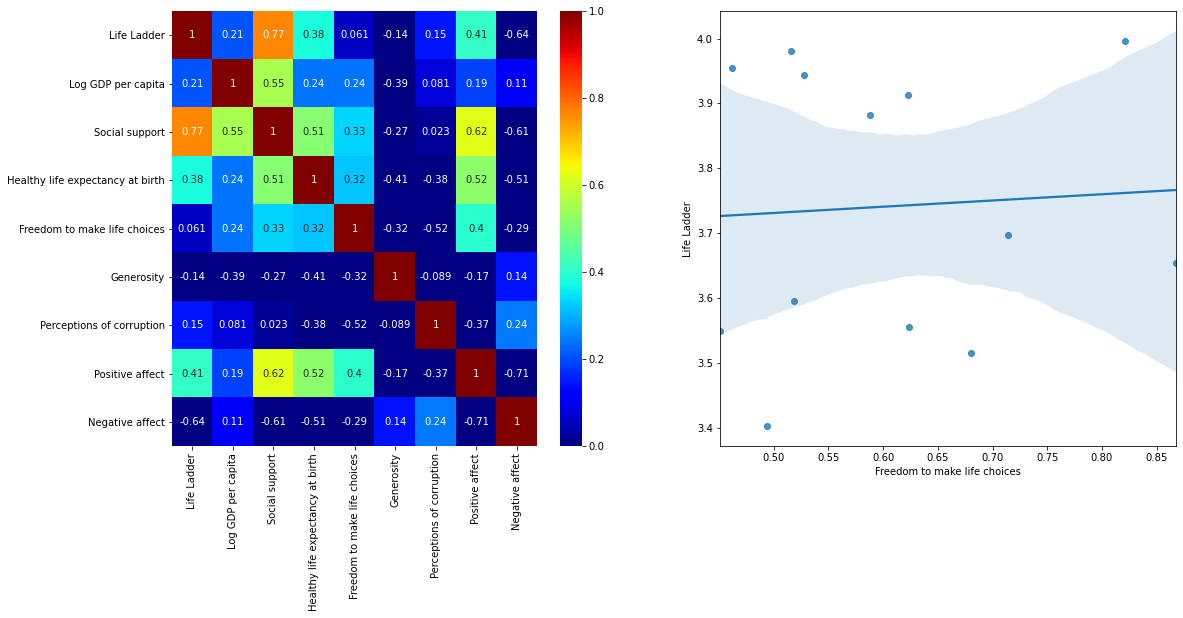

In [43]:
fig, axes = plt.subplots(figsize=(18, 8), ncols=2)

not_happy = hpp2[(hpp2["Life Ladder"] <= 4) & (hpp2["Life Ladder"] > 0)]
sns.heatmap(ax=axes[0], data=not_happy.corr(), vmin=0.0 , vmax = 1,cmap='jet' , annot=True)
sns.regplot(ax = axes[1], x="Freedom to make life choices" , y='Life Ladder', data=not_happy);

#### In "unhappy" countries, it can be seen that an increase in the score on the "Life Ladder" does not lead to a decrease in the perception of corruption.
#### In the original data of the "unhappy" we had a "problematic" country (Rwanda) whose values were in considerable deviation, so we chose to filter it.

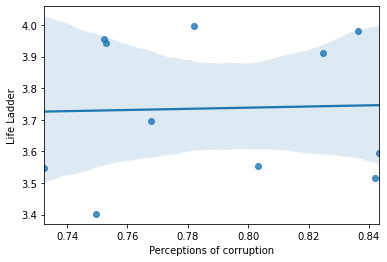

In [44]:
not_happy2 = not_happy.copy()
part3 = not_happy2[0:7]
part4 = not_happy2[8:12]
not_happy3 = pd.concat([part3, part4], axis=0)
not_happy3
sns.regplot (x="Perceptions of corruption" , y='Life Ladder', data=not_happy3);

> ## Conclusion 3:

> ### From the data we presented, it can be concluded that in unhappy countries there are common characteristics, such as: independence between the "Life Ladder" and the perception of corruption, and in addition and the freedom of choice. From these conclusions it is possible to deduce from them the characteristics of truly unhappy countries.


## In order to test the reliability of the conclusions, we decided to build a "DecisionTreeRegressor" model that predicts according to the characteristics we have derived only the "Life Ladder" in the country.

In [45]:
features = ["Social support","Freedom to make life choices","Perceptions of corruption"]
y = hpp2["Life Ladder"]
X = hpp2[features]
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=0) 
happy_model = DecisionTreeRegressor(random_state=4, max_depth = 2)
happy_model.fit(X_train, y_train)
test_pred = happy_model.predict(X_test)


def mse(a,b):
    return np.sqrt(np.square(a-b).mean())


print("MSE: {:.3f}".format(mse(y_test.values,test_pred)))

df = pd.DataFrame(columns = ['Life Ladder', 'Predictions'])
df['Life Ladder'] = y_test
df = df.reset_index(drop=True)
df['Predictions'] = pd.Series(test_pred)
df.head(15)



MSE: 0.632


,Life Ladder,Predictions
0,3.912250,4.416904
1,4.873000,5.959421
2,4.411462,5.171777
3,6.253214,5.171777
4,3.555000,4.416904
5,5.549929,5.171777
6,7.242231,7.123432
7,4.513571,4.416904
8,5.874933,5.171777
9,5.306857,5.959421


> ## The main conclusion:

>### From the analysis of the Happy Planet Index and based on the model built (which was good to predict with a slight deviation of only MSE: 0.632)
>### It is concluded that the main characteristics of a happy country are: 
>### 1) Social support
>### 2) Perception of corruption in the country 
>### 3) and freedom of choice

🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄
---
</div>
